# Python project
### Roi Almakias 
### Alexandra Asinovskaya 



# Startup success prediction

Using the startup [dataset](https://www.kaggle.com/manishkc06/startup-success-prediction) from Kaggle.

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

**About the Data**

The data contains industry trends, investment insights and individual company information. There are **48** columns/features. Some of the features are:

* agefirstfunding_year – quantitative
* agelastfunding_year – quantitative
* relationships – quantitative
* funding_rounds – quantitative
* fundingtotalusd – quantitative
* milestones – quantitative
* agefirstmilestone_year – quantitative
* agelastmilestone_year – quantitative
* state – categorical
* industry_type – categorical
* has_VC – categorical
* has_angel – categorical
* has_roundA – categorical
* has_roundB – categorical
* has_roundC – categorical
* has_roundD – categorical
* avg_participants – quantitative
* is_top500 – categorical
* status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split as ttsp
from sklearn import feature_selection as ftr_slct
from sklearn.preprocessing import scale
import seaborn as sns; sns.set_theme()
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor
from warnings import simplefilter
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.utils import resample

In [2]:
startup = pd.read_csv('startup_data.csv')
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
startup.shape

(923, 49)

In [4]:
startup.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [5]:
startup.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

We can see that there are a lot of missing values in variables in *age_first_milestone_year* and *age_last_milestone_year*. It can be because other startups didn't have milestones at all. Here we will not assume that and will get rid of this variables completely.  But we will delete variables *Unnamed: 0*,  *Unnamed: 6*, *name*, *zip_code*, *id* and *object_id*, because those are unique values that definitely will not help predictions. Also we will drop variable *closed_at* because, naturaly, it has a lot of missing values.

Also, some of the variables we will transform to suit better for our prediction. Each variable of dates we will transform to two separate variables, one for month and one for year. Also we will get rid of variable *status*, because we have dummy variable *labels* for prediction.


In [6]:
startup["founded_at"]=pd.to_datetime(startup["founded_at"],format="%m/%d/%Y")
startup["first_funding_at"]=pd.to_datetime(startup["first_funding_at"],format="%m/%d/%Y")
startup["last_funding_at"]=pd.to_datetime(startup["last_funding_at"],format="%m/%d/%Y")

startup["founding_year"]=startup["founded_at"].dt.year
startup["founding_month"]=startup["founded_at"].dt.month
startup["first_funding_year"]=startup["first_funding_at"].dt.year
startup["first_funding_month"]=startup["first_funding_at"].dt.month
startup["last_funding_year"]=startup["founded_at"].dt.year
startup["last_funding_month"]=startup["founded_at"].dt.month
drop_var = ['founded_at','first_funding_at','last_funding_at','status']
startup.drop(drop_var, axis=1, inplace=True)
startup.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,has_roundC,has_roundD,avg_participants,is_top500,founding_year,founding_month,first_funding_year,first_funding_month,last_funding_year,last_funding_month
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,0,0,1.0000,0,2007,1,2009,4,2007,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,1,1,4.7500,1,2000,1,2005,2,2000,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,0,0,4.0000,1,2009,3,2010,3,2009,3
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,1,1,3.3333,1,2002,1,2005,2,2002,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,0,0,1.0000,1,2010,8,2010,8,2010,8


In [7]:
drop_var = ['age_first_milestone_year','age_last_milestone_year', 'Unnamed: 0',  'Unnamed: 6', 'name', 'zip_code', 'id',
            'object_id', 'closed_at','state_code','state_code.1','category_code']
startup.drop(drop_var, axis=1, inplace=True)
startup.head()

,latitude,longitude,city,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_roundC,has_roundD,avg_participants,is_top500,founding_year,founding_month,first_funding_year,first_funding_month,last_funding_year,last_funding_month
0,42.358880,-71.056820,San Diego,1,2.2493,3.0027,3,3,375000,3,...,0,0,1.0000,0,2007,1,2009,4,2007,1
1,37.238916,-121.973718,Los Gatos,1,5.1260,9.9973,9,4,40100000,1,...,1,1,4.7500,1,2000,1,2005,2,2000,1
2,32.901049,-117.192656,San Diego,1,1.0329,1.0329,5,1,2600000,2,...,0,0,4.0000,1,2009,3,2010,3,2009,3
3,37.320309,-122.050040,Cupertino,1,3.1315,5.3151,5,3,40000000,1,...,1,1,3.3333,1,2002,1,2005,2,2002,1
4,37.779281,-122.419236,San Francisco,0,0.0000,1.6685,2,2,1300000,1,...,0,0,1.0000,1,2010,8,2010,8,2010,8


In [8]:
startup["city"].unique().size

221

In [9]:
startup["city"].value_counts().sort_values(ascending=False).head(n=20)

San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Santa Clara       27
Austin            27
San Mateo         26
Seattle           26
Sunnyvale         22
San Jose          18
Cambridge         16
Menlo Park        16
Los Angeles       15
San Diego         15
Redwood City      14
Boston            13
Chicago           13
Waltham           12
Burlington        11
Santa Monica      10
Name: city, dtype: int64

We can see that we have one categorical value *city* with 221 unique values. To include all of them in the model we will have to make 221 dummy varables for each city. In order to make our data less combersome, we will use only 20 dummy variables for cities with 10 and more startups and the rest we will mark as *other*.

In [10]:
other = startup["city"].value_counts().sort_values(ascending=False).index
startup["city"]= ["other" if startup["city"][i] not in other[0:20] else startup["city"][i] for i in startup["city"].index]

In [11]:
startup["West"]=[1 if i<=(-110) else 0 for i in startup["longitude"]]
#startup["WCenterE"]=[1 if i>=-110 and i<-90 else 0 for i in startup["longitude"]]
startup["East"]=[1 if i>=-90 else 0 for i in startup["longitude"]]
startup["South"]=[1 if i<=37 else 0 for i in startup["latitude"]]
#startup["SCenterN"]=[1 if i>=37 and i<42 else 0 for i in startup["latitude"]]
startup["North"]=[1 if i>=42 else 0 for i in startup["latitude"]]

In [12]:
startup.drop(["latitude","longitude"], axis=1, inplace=True)
cat_names = sorted(startup.select_dtypes(include='object'))
startup_d = pd.get_dummies(startup, columns=cat_names)
startup_d.head()

,labels,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,city_San Diego,city_San Francisco,city_San Jose,city_San Mateo,city_Santa Clara,city_Santa Monica,city_Seattle,city_Sunnyvale,city_Waltham,city_other
0,1,2.2493,3.0027,3,3,375000,3,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,5.1260,9.9973,9,4,40100000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1.0329,1.0329,5,1,2600000,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,3.1315,5.3151,5,3,40000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0000,1.6685,2,2,1300000,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Visual analisys

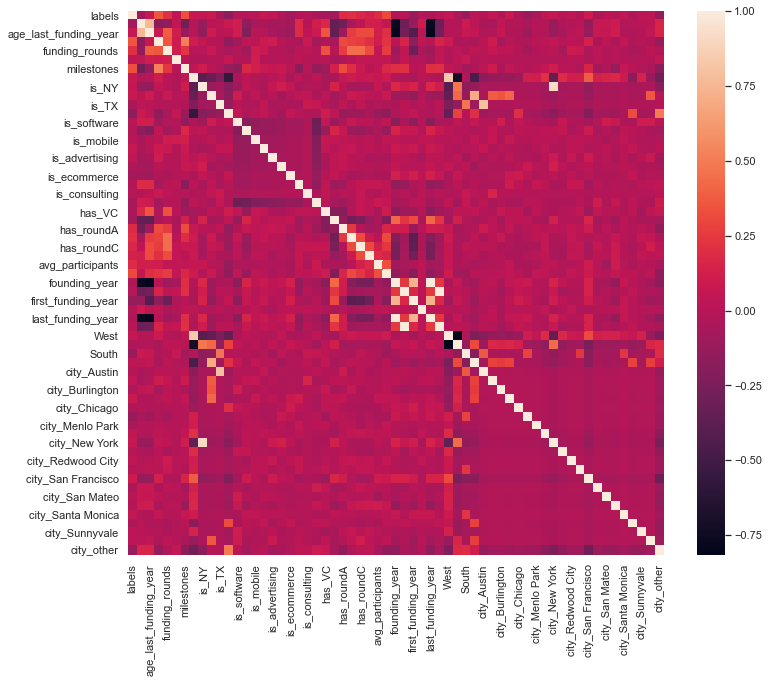

In [13]:
np.random.seed(0)
figure(figsize=(12, 10))
ax = sns.heatmap(startup_d.corr())

We can see that some variables have high correlation, and it can be a problem for some models. However, this is expected, because we have variables like *city_New York* and *is_NY* for example, as it can be that most of startups in state New york are in New York city.

[None]

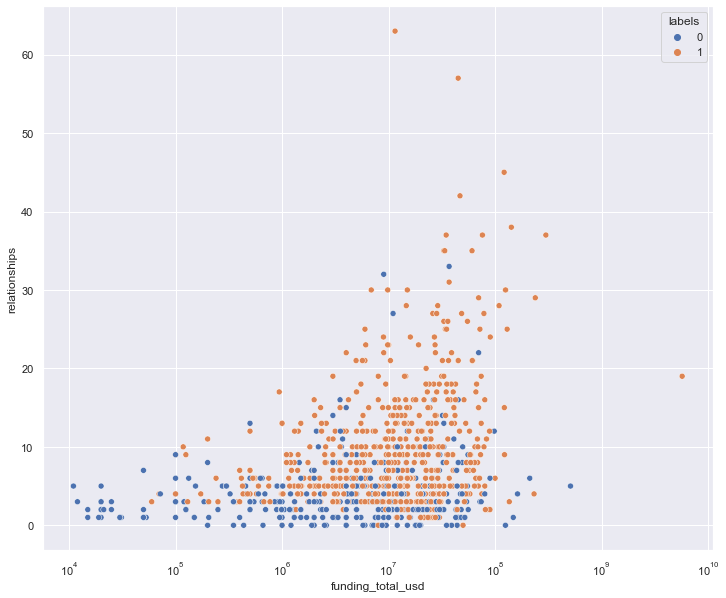

In [14]:
figure(figsize=(12, 10))
splot = sns.scatterplot(data=startup_d, x="funding_total_usd", y="relationships", hue="labels")
splot.set(xscale="log")

There can between of number of relationships and total funding to probability of success.

In [15]:
startup["category"] = startup[["is_software","is_web","is_mobile","is_enterprise","is_advertising","is_gamesvideo","is_ecommerce","is_biotech","is_consulting","is_othercategory"]].idxmax(axis=1)

<AxesSubplot:xlabel='category', ylabel='count'>

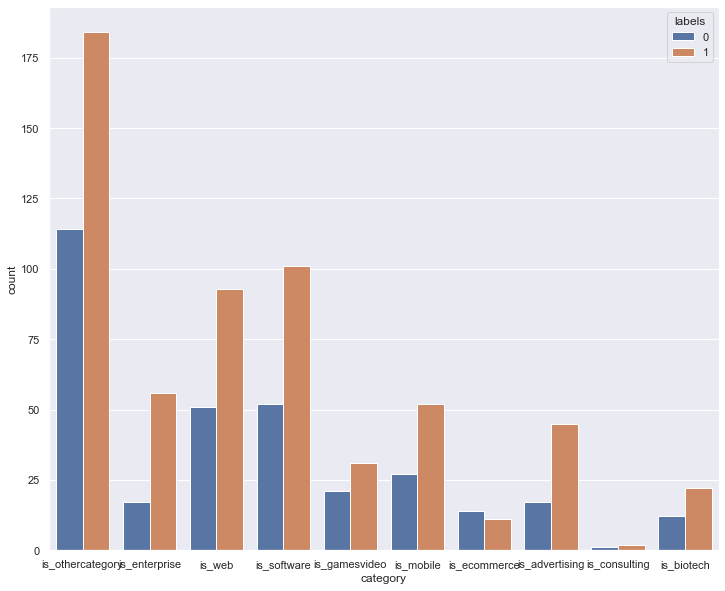

In [16]:
figure(figsize=(12, 10))
sns.countplot(x="category",hue="labels", data=startup)

From graph above we can see that overall there are more successful prediction in almost all categories. In software there are more successful startups, but in e-commerce there are more failing ones. 

<AxesSubplot:xlabel='city', ylabel='count'>

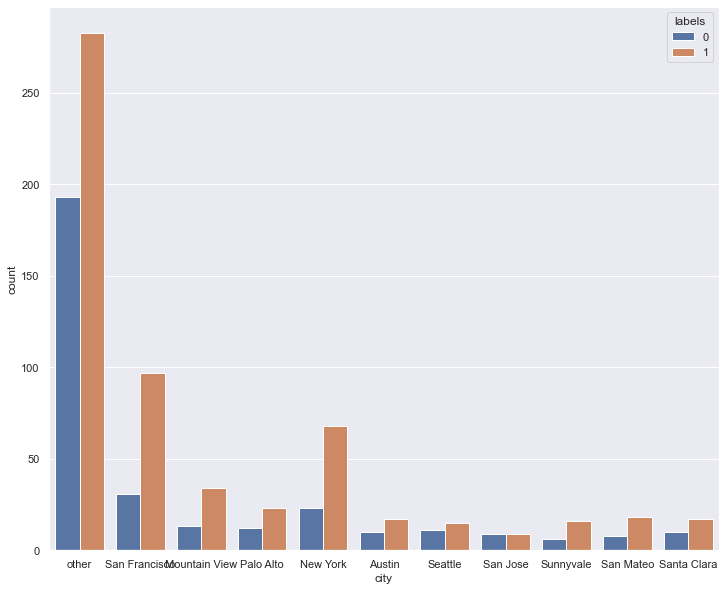

In [17]:
figure(figsize=(12, 10))
startup["city"]= ["other" if startup["city"][i] not in other[0:10] else startup["city"][i] for i in startup["city"].index]
sns.countplot(x="city",hue="labels", data=startup)

In [18]:



def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(startup_d).sort_values(by="VIF",ascending=False).head(n=20)

C:\Users\97253\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
30,founding_year,inf
14,is_mobile,inf
59,city_Waltham,inf
54,city_San Mateo,inf
50,city_Redwood City,inf
49,city_Palo Alto,inf
47,city_Mountain View,inf
34,last_funding_year,inf
31,founding_month,inf
21,is_othercategory,inf


It seems that we have some predictors with high collinearity so we will drop some of them.

In [20]:
startup_d.drop(["city_other","is_othercategory","is_otherstate","founding_year","last_funding_month","last_funding_year","first_funding_year"], axis=1, inplace=True)

Let's see if it helped. 

In [21]:
calc_vif(startup_d).sort_values(by="VIF",ascending=False).head(n=20)

,variables,VIF
2,age_last_funding_year,21.320003
7,is_CA,16.181416
30,West,16.072461
4,funding_rounds,14.396480
1,age_first_funding_year,11.246551
8,is_NY,8.618619
27,is_top500,7.558465
42,city_New York,7.330466
31,East,6.029952
6,milestones,5.230504


In [22]:
x=startup_d.drop(columns=['labels'])
y=startup_d['labels']

In [23]:
selector = ftr_slct.VarianceThreshold(0.003)
selector.fit_transform(x).shape

(923, 53)

It looks like we don't have predictors with very low variance. 

In [24]:


simplefilter(action='ignore', category=FutureWarning)

In [25]:
# scaling the data
scaled_x = scale(x)

In [26]:
scaled_x=pd.DataFrame(scaled_x,columns=x.columns)

In [27]:
x_train, x_test , y_train ,y_test =ttsp(scaled_x,y,test_size=0.25)

### LASSO for variables selection

We have a lot of variables, and we know that logistic regression is not very flexible, thats why to get a better prediction we will use LASSO to select variables to avoid underfitting. 

In [28]:

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver="liblinear")) # reducing the amount of predictors with LASSO
sel_.fit(x_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [29]:
selected_feat = x_train.columns[(sel_.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 53
selected features: 47
features with coefficients shrank to zero: 6


In [30]:
x_train_sel = sel_.transform(x_train)
x_test_sel = sel_.transform(x_test)
x_train_sel.shape, x_test_sel.shape

((692, 47), (231, 47))

### Logistic Regression

In [31]:
# using only selected variables
log_model = LogisticRegression()
log_model.fit(x_train_sel,y_train)
y_pred = log_model.predict(x_test_sel)

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [33]:
(tn,fp,fn,tp)

(34, 47, 29, 121)

In [34]:

acc_log = accuracy_score(y_test, y_pred)
acc_log

0.670995670995671

# LDA

In [35]:

lda = LinearDiscriminantAnalysis()
mod_lda = lda.fit(x_train, y_train)
y_pred=mod_lda.predict(x_test)

In [36]:
acc_lda = accuracy_score(y_test, y_pred)
acc_lda

0.670995670995671

### K Neighbors Classifier


In [37]:
knn = KNeighborsClassifier
cv_knn=np.array([])
k_chk=range(1,round(0.9*len(y_train)),2)
# finding k with highest accuracy through cross-validation
for k in k_chk:
    knn2=knn(n_neighbors=k)
    cv_knn=np.append(cv_knn,cross_val_score(knn2, x_train, y_train, cv=10, scoring='accuracy').mean())

In [38]:
chosen_k=k_chk[np.min(np.where(cv_knn>=(cv_knn.max()-0.01)))]
chosen_k

21

<AxesSubplot:>

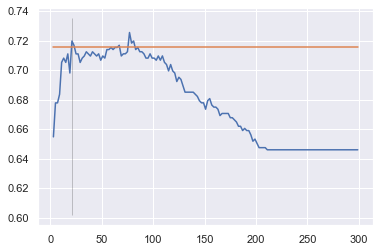

In [39]:
sns.lineplot(k_chk[1:150],cv_knn[1:150])
sns.lineplot(k_chk[1:150],cv_knn.max()-0.01)
sns.lineplot(x=np.array([chosen_k,chosen_k]),y=np.array([cv_knn.min()-0.01,cv_knn.max()+0.01]), color="0",linewidth=0)

In [40]:
knn2=knn(n_neighbors=chosen_k)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [41]:
y_pred=knn2.predict(x_test)

In [42]:
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.7186147186147186

## SVM


### linear

In [43]:

CV_SVC1=np.array([])
# finding tunning parameter with highest accuracy through cross-validation
for c in range(1,100):
    svc1=SVC(C=c/20,kernel="linear")
    CV_SVC1=np.append(CV_SVC1,cross_val_score(svc1, x_train, y_train, cv=10, scoring='accuracy').mean())
chosen_c_l=np.min(np.where(CV_SVC1>=(CV_SVC1.max()-0.01)))+1
chosen_c_l

1

In [44]:
SVC2=SVC(C=chosen_c_l/20,kernel="linear")
SVC2.fit(x_train,y_train)

SVC(C=0.05, kernel='linear')

In [45]:
y_pred=SVC2.predict(x_test)

In [46]:
acc_svm_l = accuracy_score(y_test, y_pred)
acc_svm_l

0.696969696969697

### radial

In [47]:
CV_SVC2=np.array([])
gamma_estimators=np.array([0.01,0.05,0.1,0.15,0.2,0.25,0.3,1/3,0.4,0.5])
# findind best tunning parameter and gamma through cross-validation
for c in range(1,100):
    for g in gamma_estimators:
        svc2=SVC(C=c/20,gamma=g)
        CV_SVC2=np.append(CV_SVC2,cross_val_score(svc2, x_train, y_train, cv=10, scoring='accuracy').mean())


In [48]:
chosen_c_r=int(np.min(np.where(CV_SVC2>=(CV_SVC2.max()-0.01)))/10)+1
chosen_c_r

11

In [49]:
chosen_g=gamma_estimators[((np.min(np.where(CV_SVC2>=(CV_SVC2.max()-0.01))))%10)]
chosen_g

0.01

In [50]:
SVC3=SVC(C=chosen_c_r/20,gamma=chosen_g)
SVC3.fit(x_train,y_train)

SVC(C=0.55, gamma=0.01)

In [51]:
y_pred=SVC3.predict(x_test)

In [52]:
acc_svm_r = accuracy_score(y_test, y_pred)
acc_svm_r

0.7186147186147186

### polynomial

In [53]:
CV_SVC3=np.array([])
gamma_estimators=np.array([0.01,0.05,0.1,0.15,0.2,0.25,0.3,1/3,0.4,0.5])
costs20=np.array([0.8*chosen_c_r,0.86*chosen_c_r,0.89*chosen_c_r,0.92*chosen_c_r,0.94*chosen_c_r,0.96*chosen_c_r,0.98*chosen_c_r,0.99*chosen_c_r,chosen_c_r,
                  1.01*chosen_c_r,1.02*chosen_c_r,1.04*chosen_c_r,1.06*chosen_c_r,1.09*chosen_c_r,1.11*chosen_c_r,1.14*chosen_c_r,1.18*chosen_c_r,1.2*chosen_c_r])
# findind best tunning parameter, coefficient, gamma, and degree of polynomial through cross-validation
for c in costs20:
    for d in range(1,7):
        for coef in range(0,5):
                svc3=SVC(C=c/20,gamma=chosen_g,degree=d,kernel="poly",coef0=coef/5,max_iter=2000000)
                CV_SVC3=np.append(CV_SVC3,cross_val_score(svc3, x_train, y_train, cv=6, scoring='accuracy').mean())


In [54]:
chosen_coef0=int(np.min(np.where(CV_SVC3>=(CV_SVC3.max()-0.01)))%5)+1
chosen_coef0

5

In [55]:
chosen_deg=int((np.min(np.where(CV_SVC3>=(CV_SVC3.max()-0.01)))%18)/5)+1
chosen_deg

3

In [56]:
chosen_c_p=costs20[int(np.min(np.where(CV_SVC3>=(CV_SVC3.max()-0.01)))/30)]
chosen_c_p

8.8

In [57]:
SVC4=SVC(C=chosen_c_p/20,gamma=chosen_g,degree=chosen_deg,coef0=chosen_coef0/5,kernel="poly")
SVC4.fit(x_train,y_train)

SVC(C=0.44000000000000006, coef0=1.0, gamma=0.01, kernel='poly')

In [58]:
y_pred=SVC4.predict(x_test)

In [59]:
acc_svm_p = accuracy_score(y_test, y_pred)
acc_svm_p

0.7186147186147186

### Decision Tree Classifier


In [60]:
Dtc = DecisionTreeClassifier

In [61]:
cv_tree=np.array([])

for i in range(10,500):
    Dtc2=Dtc(min_weight_fraction_leaf=1/((i/10)+1))
    cv_tree=np.append(cv_tree,cross_val_score(Dtc2, x_train, y_train, cv=10,scoring="accuracy").mean())

In [62]:
chosen_i=np.min(np.where(cv_tree>=(cv_tree.max()-0.01)))+10
chosen_i

24

In [63]:
Dtc2=Dtc(min_weight_fraction_leaf=1/((chosen_i/10)+1))
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.29411764705882354)

In [64]:
text_representation = tree.export_text(Dtc2)
print(text_representation)

|--- feature_2 <= -0.58
|   |--- class: 0
|--- feature_2 >  -0.58
|   |--- feature_2 <= 0.11
|   |   |--- class: 1
|   |--- feature_2 >  0.11
|   |   |--- class: 1



In [65]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

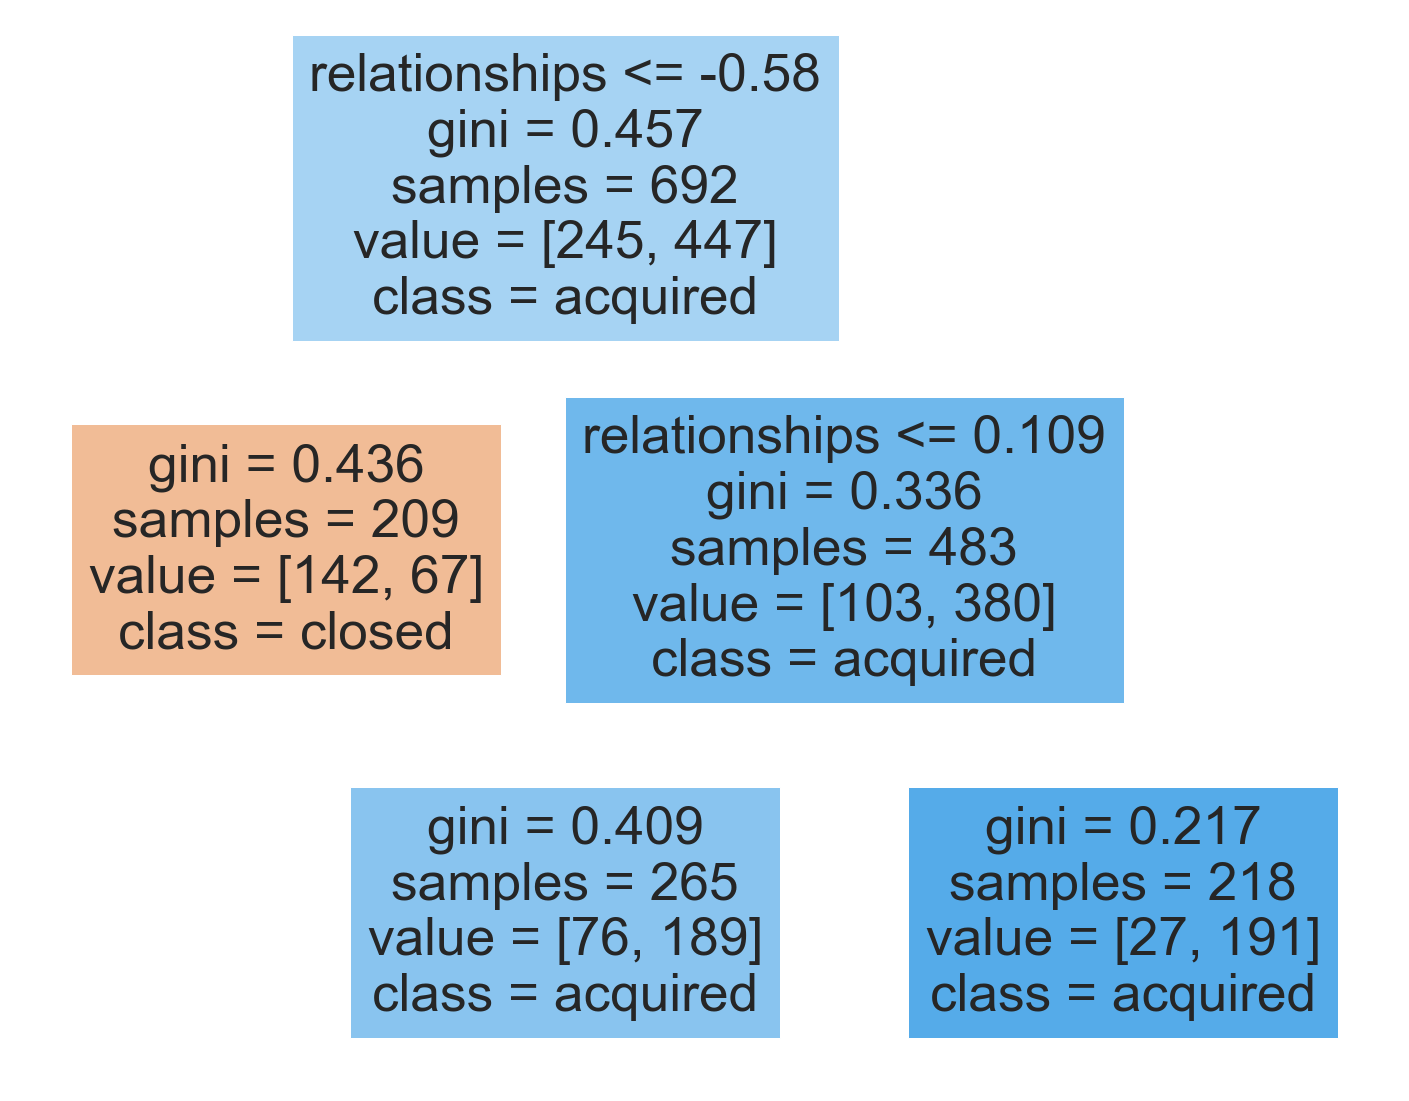

In [66]:
fig = plt.figure(figsize=(25,20))
viz_tree = tree.plot_tree(Dtc2, 
                   feature_names=x_train.columns,  
                   class_names=["closed","acquired"],
                   filled=True)

In [67]:
y_pred=Dtc2.predict(x_test)

In [68]:
acc_tree = accuracy_score(y_test,y_pred)
acc_tree

0.7359307359307359

### Bagging

In [69]:
cv_bgng=np.array([])
n_estimators=np.array([10,50,100,250,500,1000])
ccp_alpha=np.array([0,0.001,0.005,0.01,0.02,1/((chosen_i/10)+1),0.05,0.1,0.2,0.33])
for i in n_estimators:
    for j in ccp_alpha:
        base = DecisionTreeClassifier(min_weight_fraction_leaf=j)
        bgng = BaggingClassifier(base_estimator = base, 
                          n_estimators = i)
        cv_bgng=np.append(cv_bgng,cross_val_score(bgng, x_train, y_train, cv=6,scoring="accuracy",n_jobs=-1).mean())

In [70]:
chosen_est1=n_estimators[int(np.min(np.where(cv_bgng>=(cv_bgng.max()-0.01)))/10)]
chosen_est1

50

In [71]:
chosen_ccp=ccp_alpha[((np.min(np.where(cv_bgng>=(cv_bgng.max()-0.01))))%10)]
chosen_ccp

0.001

In [72]:
base = DecisionTreeClassifier(min_weight_fraction_leaf=chosen_ccp)
bgng2 = BaggingClassifier(base_estimator = base, 
                          n_estimators = chosen_est1)

In [73]:
bgng2.fit(x_train, y_train)
y_pred=bgng2.predict(x_test)
acc_bag = accuracy_score(y_test,y_pred)
acc_bag

0.7489177489177489

### Random Forest

In [74]:

cv_rf=np.array([])
new_estimators=np.array([np.array([chosen_est1-200,5]).max(),np.array([chosen_est1-50,8]).max() ,chosen_est1,chosen_est1+100,chosen_est1+250])
mtry_est=np.array([2,5,7,10,12,15,18,20,28,35])
for i in new_estimators:
    for m in mtry_est:

        
        RFC= RandomForestClassifier(n_estimators=i,ccp_alpha=chosen_ccp,max_features=m)
        cv_rf=np.append(cv_rf,cross_val_score(RFC, x_train, y_train, cv=6,scoring="accuracy",n_jobs=-1).mean())
        

In [75]:
chosen_est2=new_estimators[int(np.min(np.where(cv_rf>=(cv_rf.max()-0.01)))/10)]
chosen_est2

50

In [76]:
chosen_mtry=mtry_est[((np.min(np.where(cv_rf>=(cv_rf.max()-0.01))))%10)]
chosen_mtry

20

In [77]:
RFC2= RandomForestClassifier(n_estimators=chosen_est2,ccp_alpha=chosen_ccp,max_features=chosen_mtry)
RFC2.fit(x_train, y_train)
y_pred=RFC2.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
acc_rf

0.7792207792207793

### Gradient Boosting

In [78]:
cv_gbc=np.array([])
new_estimators=np.array([np.array([chosen_est2-200,5]).max(),np.array([chosen_est2-50,8]).max() ,chosen_est2,chosen_est2+100,chosen_est2+250])

for i in new_estimators:
    for m in range(1,9):
        GBC1= GBC(n_estimators=i,max_depth=m)
        cv_gbc=np.append(cv_gbc,cross_val_score(GBC1, x_train, y_train, cv=10,scoring="accuracy",n_jobs=-1).mean())

In [79]:
chosen_est3=new_estimators[int(np.min(np.where(cv_gbc>=(cv_gbc.max()-0.01)))/8)]
chosen_est3

150

In [80]:
chosen_max=((np.min(np.where(cv_gbc>=(cv_gbc.max()-0.01))))%8)+1
chosen_max

1

In [81]:
GBC2= GBC(n_estimators=chosen_est3,max_depth=chosen_max)
GBC2.fit(x_train, y_train)
y_pred=GBC2.predict(x_test)
acc_gb = accuracy_score(y_test,y_pred)
acc_gb

0.7922077922077922

# Comparing models

We will use bootstrap to obtain accuracy distribution for all our models. 

In [82]:
n_iterations = 500
n_size = int(len(x_train) * 0.50)
stats = {'LR': [], 'LDA':  [], 'KNN': [], 'SVM linear': [], 'SVM radial': [], 'SVM polynomial': [], 'TREE': [], 'BAG': [], 'RF': [], 'GB': []}

for i in range(n_iterations):
    train_x, train_y = resample(x_train, y_train, n_samples=n_size)
    model_log = LogisticRegression()
    model_log.fit(train_x, train_y)
    predictions = model_log.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['LR'].append(score)
    
    model_lda = LinearDiscriminantAnalysis()
    model_lda.fit(train_x, train_y)
    predictions = model_lda.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['LDA'].append(score)
      
    model_knn = knn(n_neighbors=chosen_k)
    model_knn.fit(train_x, train_y)
    predictions = model_knn.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['KNN'].append(score)
    
    model_svc=SVC(C=chosen_c_l/20,kernel="linear")
    model_svc.fit(train_x,train_y)
    predictions = model_svc.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['SVM linear'].append(score)

    model_svm_r=SVC(C=chosen_c_r/20,gamma=chosen_g)
    model_svm_r.fit(train_x,train_y)
    predictions = model_svm_r.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['SVM radial'].append(score)
    
    model_svm_p=SVC(C=chosen_c_p/20,gamma=chosen_g,degree=chosen_deg,coef0=chosen_coef0/5,kernel="poly")
    model_svm_p.fit(train_x,train_y)
    predictions = model_svm_p.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['SVM polynomial'].append(score)
    
    model_tree=Dtc(min_weight_fraction_leaf=1/((chosen_i/10)+1))
    model_tree.fit(train_x,train_y)
    predictions = model_tree.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['TREE'].append(score)
    
    model_bag = BaggingClassifier(base_estimator = base, n_estimators = chosen_est1)
    model_bag.fit(train_x,train_y)
    predictions = model_bag.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['BAG'].append(score)
    
    model_rf= RandomForestClassifier(n_estimators=chosen_est2,ccp_alpha=chosen_ccp,max_features=chosen_mtry)
    model_rf.fit(train_x,train_y)
    predictions = model_rf.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['RF'].append(score)
    
    model_gb= GBC(n_estimators=chosen_est3,max_depth=chosen_max)
    model_gb.fit(train_x,train_y)
    predictions = model_gb.predict(x_test)
    score = accuracy_score(y_test, predictions)
    stats['GB'].append(score)


In [83]:
stats = pd.DataFrame(data=stats)
stats.head()

,LR,LDA,KNN,SVM linear,SVM radial,SVM polynomial,TREE,BAG,RF,GB
0,0.658009,0.662338,0.705628,0.718615,0.718615,0.718615,0.735931,0.735931,0.761905,0.787879
1,0.649351,0.610390,0.658009,0.670996,0.709957,0.709957,0.718615,0.744589,0.744589,0.766234
2,0.653680,0.645022,0.692641,0.688312,0.705628,0.658009,0.718615,0.774892,0.761905,0.748918
3,0.658009,0.662338,0.666667,0.683983,0.705628,0.683983,0.718615,0.740260,0.761905,0.731602
4,0.683983,0.683983,0.714286,0.705628,0.722944,0.705628,0.718615,0.722944,0.722944,0.779221


In [84]:
alpha = 0.95
lower = list()
upper = list()
for i in stats.columns:
    p = ((1.0-alpha)/2.0) * 100
    lower.append(max(0.0, np.percentile(stats[i], p)))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper.append(min(1.0, np.percentile(stats[i], p)))

In [85]:
d = {'test accuracy': [acc_log, acc_lda, acc_knn, acc_svm_l, acc_svm_r, acc_svm_p, acc_tree, acc_bag, acc_rf, acc_gb], 'lower bound': lower, 'upper bound' : upper}
accuracy  = pd.DataFrame(data=d, index=['logistic regression', 'LDA','K-NN', 'SVM linear', 'SVM radial', 'SVM polynomial', 'Decidion tree','Bagging', 'Random Forest', 'Gradient Boosting'])
accuracy

,test accuracy,lower bound,upper bound
logistic regression,0.670996,0.632035,0.727273
LDA,0.670996,0.619048,0.714286
K-NN,0.718615,0.645022,0.727273
SVM linear,0.696970,0.653680,0.733874
SVM radial,0.718615,0.670996,0.731602
SVM polynomial,0.718615,0.666667,0.742532
Decidion tree,0.735931,0.649351,0.735931
Bagging,0.748918,0.692641,0.783550
Random Forest,0.779221,0.714286,0.787879
Gradient Boosting,0.792208,0.725000,0.792208


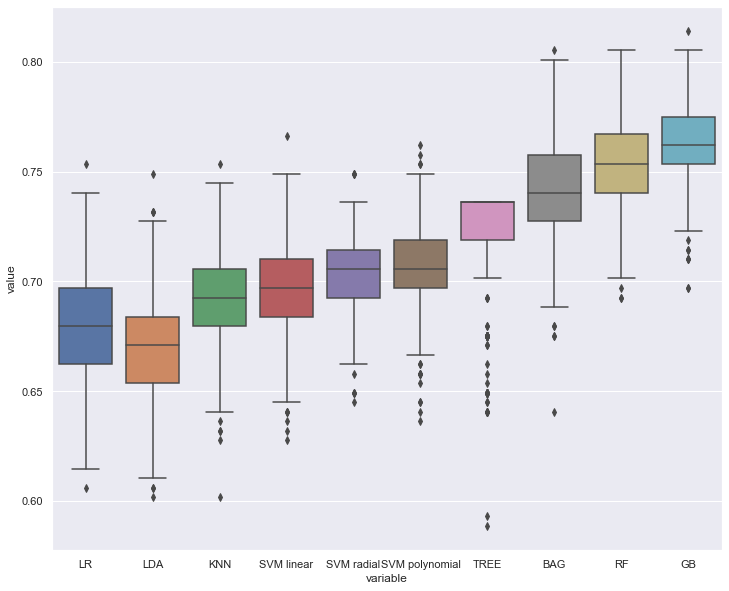

In [86]:
figure(figsize=(12, 10))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(stats))

We can see from boxplot that Random Forest, Bagging and Gradient Boosting peformend best in this case. It can be because all other model are not flexible enough, like LDA or logistic regression.